## Simple Logistic Regression
---
This part of the exercise implements Simple Logistic Regression from scratch.
Dataset used in ex2data1.txt
It has 2 features - Exam 1 score and Exam 2 score.
The aim is to predict whether the student gets admitted into a unversity based on the scores of these 2 exams.

In [1]:
#Importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Logistic function
def sigmoid(x,deriv=False):
	if deriv is True:
		return x*(1-x)
	return 1/(1+np.exp(-x))

In [3]:
#Prediction method
def predict(theta,x):
	res = sigmoid(np.dot(x,theta))
	return np.array([1 if x>=0.5 else 0 for x in res]).reshape(res.shape)

In [4]:
#Loss function - Cross Entropy
def cost(theta,x,y):
	first = -y * np.log(sigmoid(np.dot(x,theta)))
	second = (1-y) * np.log(1 - sigmoid(np.dot(x,theta)))
	return np.sum(first-second) / len(x)

In [5]:
#Initializing data
data = pd.read_csv('ex2data1.txt', header=None)
x = data.iloc[:,:2]
x = (x - x.mean()) / x.std()
x.insert(loc=0, column=None, value=1)
x = np.array(x).reshape(data.shape[0],3)
y = np.array(data.iloc[:,2]).reshape(data.shape[0],1)

In [6]:
#Initializing weight vector
theta = np.array([[0],[0],[0]])

#Hyperparameters
alpha = 5e-5
iters = 10000

In [7]:
#Gradient Descent
init_cost = str(cost(theta,x,y));

for i in range(iters):
	theta = theta - (((alpha)/(len(x))) * ( np.dot(x.T, sigmoid(np.dot(x,theta)) - y)))

print("Final weights:")
print(theta)
print("Initial cost:" + str(init_cost))
print("Final cost:" + str(cost(theta,x,y)))

Final weights:
[[0.04701196]
 [0.13179276]
 [0.11765801]]
Initial cost:0.6931471805599453
Final cost:0.6262210592815479


In [8]:
#Evaluation on Training Set
prediction = predict(theta,x)
correct = [1 if a==b else 0 for (a,b) in zip(prediction,y)]
print("Training set accuracy:" + str((sum(correct)/len(x))*100))

Training set accuracy:90.0


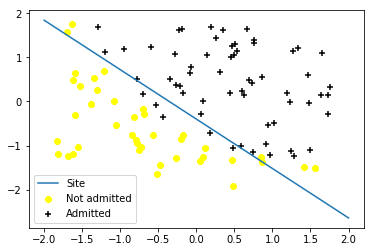

In [9]:
#Visualization
px = x[:,1]
py = x[:,2]
pz = np.array(data.iloc[:,2])

plt.scatter(px[pz==0],py[pz==0],marker='o',color='yellow',label="Not admitted")
plt.scatter(px[pz==1],py[pz==1],marker='+',color='black', label="Admitted")

plot_x = np.array([-2,2])
plt.plot(plot_x,(-theta[0]-theta[1]*plot_x)/theta[2],label='Site')
plt.legend()

## Regularized Logistic Regression
---
This part of the exercise implements Regularized Logistic Regression from scratch to predict whether the microchips from a fabrication plant passes quality assurance (QA) tests. 
Dataset used is ex2data2.txt.
It has 2 features - Result of Test 1 and Test 2 on microchips.
The aim is to find whether the microchips should be accepted or rejected.

In [10]:
#Regularized Loss Function
def regularized_cost(theta, x, y, lambd):
    first_cost = cost(theta, x, y)
    reg_cost = (lambd/(2*len(x))) * (np.sum(theta[1:]**2))
    return first_cost+reg_cost

In [11]:
#Feature Mapping
def mapFeatures(x1, x2):
    #Adding extra features which are combinations of the 2 features upto degree 6
    #Example - (x1**2), (x2**2), (x1*x2), (x1**3) etc
    x = pd.DataFrame()
    degree = 6
    ctr=1
    for i in range(1,degree+1):
        for j in range(0,i+1):
            x[ctr] = (x1**(i-j))*(x2**j)
            ctr+=1
    return x


In [12]:
#Initializing data
data2 = pd.read_csv('ex2data2.txt', names=['x1' ,'x2' ,'y'])
x1 = data2.iloc[:,0]
x2 = data2.iloc[:,1]
y = data2.iloc[:,2]

#Feature mapping 
x = mapFeatures(x1, x2)
#Feature Scaling
xmean = x.mean()
xstd = x.std()
x = (x-xmean)/xstd

x.insert(loc=0,column=0,value=1)

In [13]:
#Initializing weight vector with zeros
theta = np.zeros(x.shape[1]).reshape(x.shape[1],1)

#Hyperparameters
alpha=0.99
iters=500
lambd=1

In [14]:
x = np.array(x)
y = np.array(y).reshape(y.shape[0],1)

#Gradient Descent
m = len(x)
plot_cost = []
for i in range(iters):
    
    if i%50==0:
        print("Cost:" + str(regularized_cost(theta, x, y, lambd)))
    
    plot_cost.append(regularized_cost(theta, x, y, lambd))
    theta[0] = theta[0] - (((alpha)/m) * ( np.dot((x[:,0].reshape(x[:,0].shape[0],1)).T, sigmoid(np.dot(x,theta)) - y)))
    theta[1:] = theta[1:] - ( (((alpha)/m) * ( np.dot(x[:,1:].T, sigmoid(np.dot(x,theta)) - y))) + ((lambd/m) * theta[1:]) )

print("Final cost:" + str(regularized_cost(theta, x, y, lambd)))
print("Final weights:")
print(theta)


Cost:0.6931471805599454
Cost:0.3699241446483423
Cost:0.36641270551015626
Cost:0.36600430747062807
Cost:0.36592419602817183
Cost:0.36590310428940975
Cost:0.36589640543565727
Cost:0.3658939866566
Cost:0.36589302904688364
Cost:0.3658926216963201
Final cost:0.3658924373400462
Final weights:
[[-0.52537439]
 [ 0.7087218 ]
 [ 1.30800805]
 [-0.68645014]
 [-0.89738349]
 [-0.94494528]
 [ 0.33030399]
 [ 0.36256364]
 [ 0.14579432]
 [ 0.22364598]
 [-0.86518199]
 [-0.13646653]
 [-0.23430355]
 [-0.36765679]
 [-0.89666799]
 [-0.14048047]
 [-0.05428582]
 [ 0.64399037]
 [-0.28360288]
 [-0.49732903]
 [-0.09589184]
 [-0.87293527]
 [-0.03528501]
 [-0.28147904]
 [ 0.35286388]
 [-0.68780953]
 [-0.41539011]
 [-0.56550627]]


Text(0,0.5,'Loss')

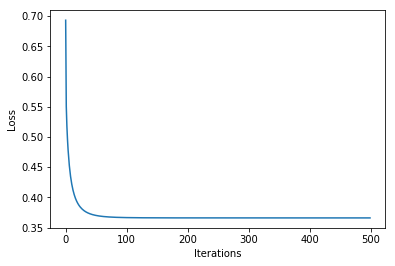

In [15]:
#Visualization of Loss
plt.plot(plot_cost)
plt.xlabel('Iterations')
plt.ylabel('Loss')

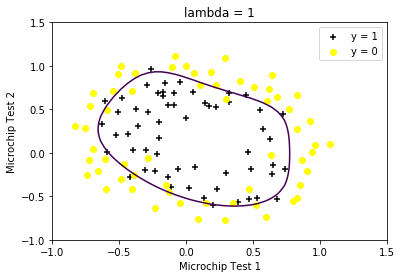

In [16]:
#Visualization
x1 = np.array(x1).reshape(x1.shape[0],1)
x2 = np.array(x2).reshape(x2.shape[0],1)
y = np.array(y).reshape(y.shape[0],1)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.title('lambda = ' + str(lambd))
plt.scatter(x1[y==1], x2[y==1], marker='+', color='black', label='y = 1')
plt.scatter(x1[y==0], x2[y==0], marker='o', color='yellow', label='y = 0')
plt.legend()

xvals = np.linspace(-1, 1.5, 50)
yvals = np.linspace(-1, 1.5, 50)
zvals = np.zeros((len(xvals), len(yvals)))

for i in range(len(xvals)):
    for j in range(len(yvals)):
        myfeaturesij = mapFeatures(np.array([xvals[i]]), np.array([yvals[j]]))
        myfeaturesij = (myfeaturesij - xmean)/xstd
        myfeaturesij.insert(loc=0, column=0, value=1)
        zvals[i][j] = np.dot(myfeaturesij, theta)
zvals = zvals.transpose()

plt.contour(xvals, yvals, zvals, [0])